In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the datasets

In [15]:
customers = pd.read_csv("Datasets/Customers.csv")
products = pd.read_csv("Datasets/Products.csv")
transactions = pd.read_csv("Datasets/Transactions.csv")

Displaying first few Rows

In [16]:
print(customers.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15


In [17]:
print(products.head())

  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31


In [18]:
print(transactions.head())

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  


Checking for missing values

In [19]:
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


Data Exploration

Analysis of Datasets

In [20]:
#Analysis of Customer Dataset
print(customers['Region'].value_counts())
print(customers['SignupDate'].describe())

Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64
count            200
unique           179
top       2024-11-11
freq               3
Name: SignupDate, dtype: object


In [21]:
#Analysis of Product Dataset
print(products['Category'].value_counts())
print(products['Price'].describe())

Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64
count    100.000000
mean     267.551700
std      143.219383
min       16.080000
25%      147.767500
50%      292.875000
75%      397.090000
max      497.760000
Name: Price, dtype: float64


In [22]:
#Analysis of Transactions Dataset
print(transactions['TotalValue'].describe())
print(transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False))

count    1000.000000
mean      689.995560
std       493.144478
min        16.080000
25%       295.295000
50%       588.880000
75%      1011.660000
max      1991.040000
Name: TotalValue, dtype: float64
ProductID
P059    46
P054    46
P029    45
P079    43
P061    43
        ..
P044    13
P060    13
P024    12
P099    11
P031     9
Name: Quantity, Length: 100, dtype: int64


Visualizing the Dataset

Univariate Analysis

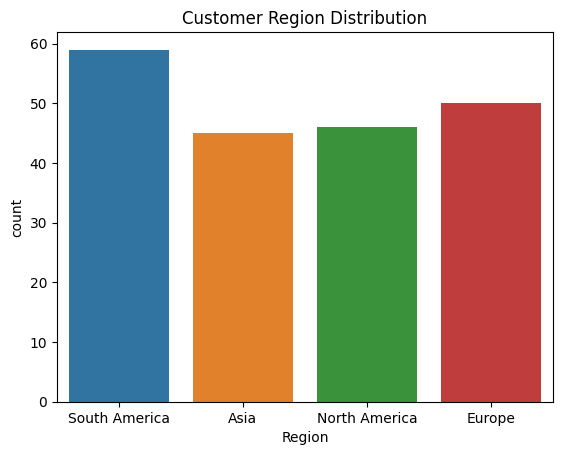

In [23]:
#Plotting the Regional Distribution
sns.countplot(data=customers, x='Region')
plt.title('Customer Region Distribution')
plt.show()

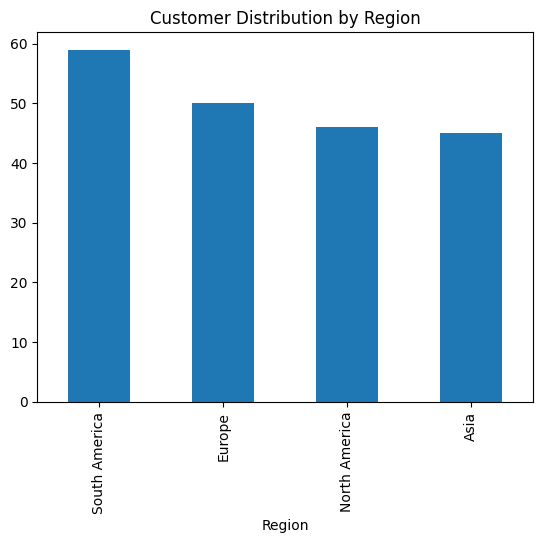

In [24]:
# Analysis of number of customers in each region
customers['Region'].value_counts().plot(kind='bar', title='Customer Distribution by Region')
plt.show()

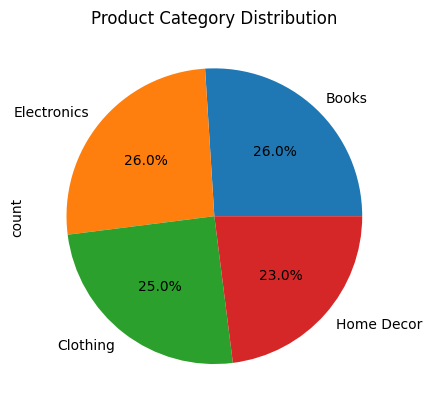

In [25]:
# Analysis of product category distribution
products['Category'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Product Category Distribution')
plt.show()

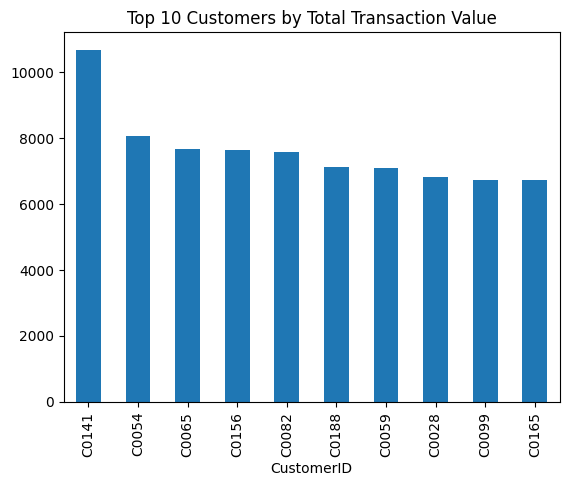

In [26]:
# Showing Top 10 customers by transaction value
top_customers = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind='bar', title='Top 10 Customers by Total Transaction Value')
plt.show()

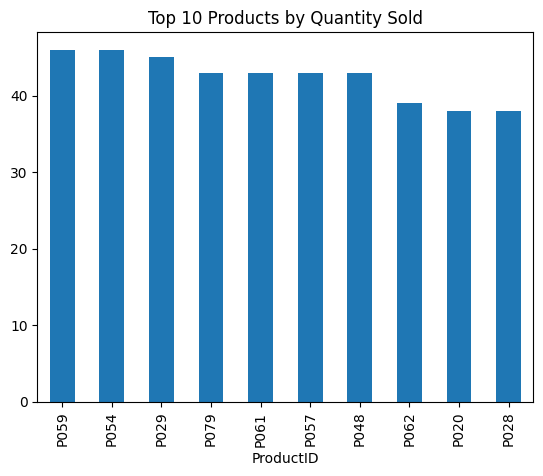

In [27]:
# Shwoing Top 10 products by quantity sold
top_products = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', title='Top 10 Products by Quantity Sold')
plt.show()